In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import stats
from sklearn.model_selection import train_test_split
%matplotlib inline
from IPython.display import Image
style.use('ggplot')

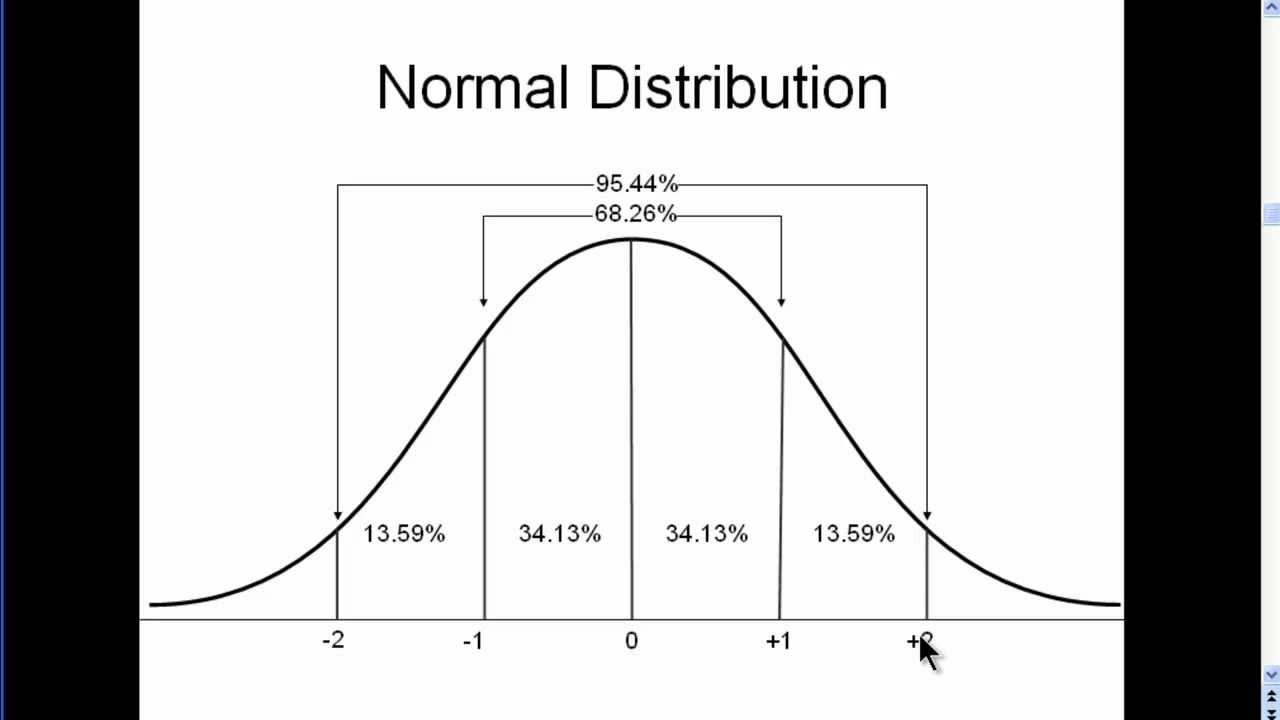

In [46]:
Image(filename='normal_dist.png')

In [9]:
df = pd.read_csv('train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalincome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5540.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,5532.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0


In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,totalincome
count,614.000000,614.000000,614.000000,614.000000,564.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.842199,7024.705081
std,6109.041673,2926.248369,84.180967,64.428629,0.364878,6458.663872
min,150.000000,0.000000,9.000000,12.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4166.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000


In [3]:
print("Table Missing values:")
print("--------------------------")
print(df.apply(lambda x: sum(x.isnull()),axis=0))
print(df.apply(lambda x: len(x),axis=0))

Table Missing values:
--------------------------
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
totalincome           0
dtype: int64
Loan_ID              614
Gender               614
Married              614
Dependents           614
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     614
Credit_History       614
Property_Area        614
Loan_Status          614
totalincome          614
dtype: int64


In [5]:
df['Gender'].fillna("Male",inplace=True)
print(df['Gender'].mode())
print(df['Gender'].unique())

0    Male
dtype: object
['Male' 'Female']


In [4]:
#used below
df1['Dependents'].fillna("0",inplace=True)
print(df1['Dependents'].mode())
print(df1['Dependents'].unique())

0    0
dtype: object
['0' '1' '2' '3+']


In [8]:
#df['Self_Employed'].fillna("No",inplace=True)
print(df['Self_Employed'].mode())
print(df['Self_Employed'].unique())

0    No
dtype: object
['No' 'Yes']


In [10]:
df['Married'].fillna("Yes",inplace=True)
print(df['Married'].mode())
print(df['Married'].unique())

0    Yes
dtype: object
['No' 'Yes']


In [12]:
df['Credit_History'].fillna('1',inplace=True)
print(df['Credit_History'].mode())
print(df['Credit_History'].unique())

0    1
dtype: object
[1.0 0.0 '1']


In [6]:
df1.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
totalincome          False
dtype: bool

# Filling Values in dependents by comparing values from another column

In [3]:
df1=pd.read_csv('train2.csv',index_col=0)
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalincome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5540.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,5532.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0


In [48]:
#stats = {'Dependents':[]}
#df2 = pd.DataFrame(np.array(df1[['Married','Dependents']]))
#df2

#test = np.array(df1[['Married','Dependents']])
test[1]

array(['Yes', '1'], dtype=object)

In [43]:
def fill(x):
    if (x[0]=='Yes' and x[1]==np.nan):
        return '3'
    elif (x[0]=='No' and x[1]==np.nan):
        return '2'

df2[1] = df2.apply(lambda x:fill(x),axis=1)
print(df2[1].unique())

[None]


In [31]:
print(df2.apply(lambda x: sum(x.isnull()),axis=0))

Dependents    15
dtype: int64


In [50]:
df1.loc[597]

Loan_ID               LP002943
Gender                    Male
Married                     No
Dependents                 NaN
Education             Graduate
Self_Employed               No
ApplicantIncome           2987
CoapplicantIncome            0
LoanAmount                  88
Loan_Amount_Term           360
Credit_History               0
Property_Area        Semiurban
Loan_Status                  N
totalincome               2987
Name: 597, dtype: object